In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from eulers_method import euler_method
from gillespie import GillespieSimulation

In [17]:
def dy_dx(y):
    return -2 * pow(y, 2)
t_euler, y_euler = euler_method(dy_dx, 0.001, 0, 100, 10000)

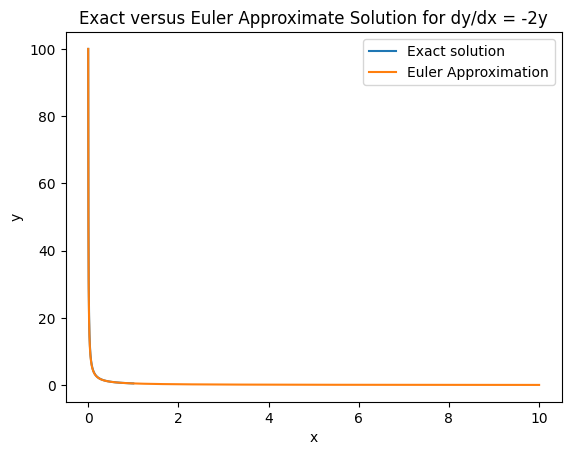

In [18]:
def exact_solution(t):
    return 100/(1 + 200*t)

t = np.arange(0, 1, 0.001)
plt.figure()
plt.plot(t, exact_solution(t), label="Exact solution")
plt.plot(t_euler, y_euler, label="Euler Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Exact versus Euler Approximate Solution for dy/dx = -2y")
plt.savefig("../../data/euler_approx.png")
plt.show()

In [21]:
error = []
for exact, euler in zip(exact_solution(t), y_euler):
    error.append((exact - euler)/exact)
sum(error)/len(error)

0.014386470653818656

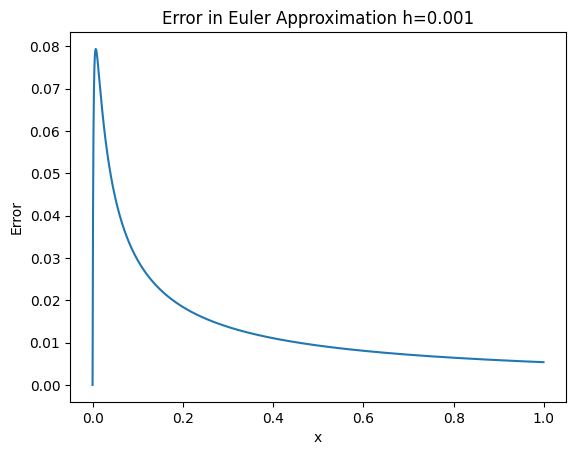

In [22]:
plt.figure()
plt.plot(t, error)
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error in Euler Approximation h=0.001")
plt.savefig("../../data/euler_error.png")

In [23]:
def reaction_kinetics(s, t, a, b):
    x = s[0]
    y = s[1]
    dy = b * x - (y * (x**2))
    dx = a + (y * (x**2)) - b*x - x
    return dx, dy

In [24]:
tout = np.linspace(0, 10, 100)
s0 = [5, 1]  # initial state vector s
params = 1.5, 4  # A = 1.5, B = 4
s_t = odeint(reaction_kinetics, s0, tout, params)

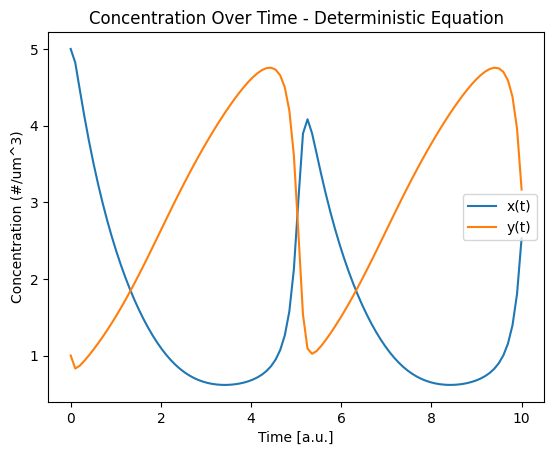

In [25]:
plt.figure()
plt.plot(tout, s_t)
plt.legend(['x(t)', 'y(t)'])
plt.xlabel("Time [a.u.]")
plt.ylabel("Concentration (#/um^3)")
plt.title("Concentration Over Time - Deterministic Equation")
plt.savefig("../../data/reaction_kinetics.png")

In [4]:
c = [1, 1/64, 1/8, 1] # define the rate constants
initial_state = [10,2]  
reactions = np.array([[1,0], [1, -1], [-1, 1], [-1, 0]])  # reaction stoichiometry
initial_propensities = np.array([1, 20/64, 10/8, 10])
time = np.linspace(0, 10, 100)  # time points to display
n = 100 # total iterations of the simulation

In [5]:
samples = np.empty((n, len(time), 2), dtype=int)
stochastic_simulation = GillespieSimulation()
for i in range(n):
    samples[i, :, :] = stochastic_simulation.run(reactions, initial_propensities, initial_state, time, c)

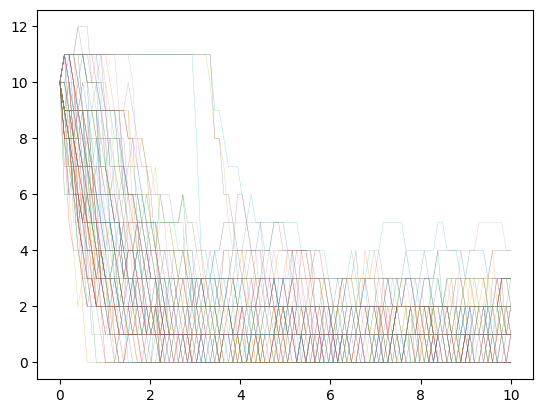

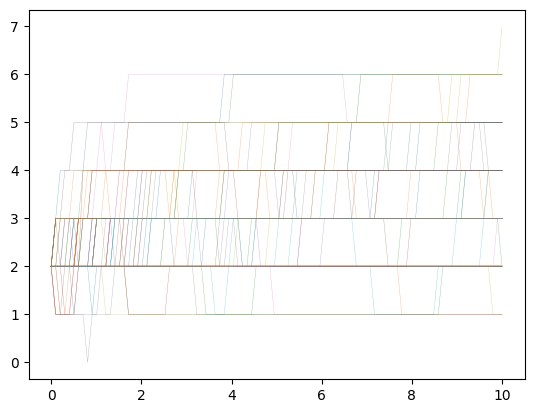

In [6]:
for i in [0, 1]:
    plt.figure()
    for idx in samples[:, :, i]:
        plt.plot(time, idx, linewidth=0.3, alpha=0.5)